In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import NearestNeighbors

In [2]:
data = pd.read_csv("credit_card_fraud_dataset.csv")
data

,Amount,Time,Class
0,115.707481,28.617357,0
1,120.481710,45.230299,0
2,92.595420,27.658630,0
3,149.939094,37.674347,0
4,85.153916,35.425600,0
...,...,...,...
995,153.229469,73.358286,1
996,132.194246,65.384208,1
997,176.475844,85.601552,1
998,205.014457,70.342874,1


In [3]:
X = data.drop(columns=['Class'])
y = data['Class']

# Isolation Forest

In [15]:
clf = IsolationForest(contamination=0.05, random_state=42)
clf.fit(X)

anomaly_scores = clf.decision_function(X)

threshold = np.percentile(anomaly_scores, 100 * 0.05)
predicted_labels = anomaly_scores < threshold

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


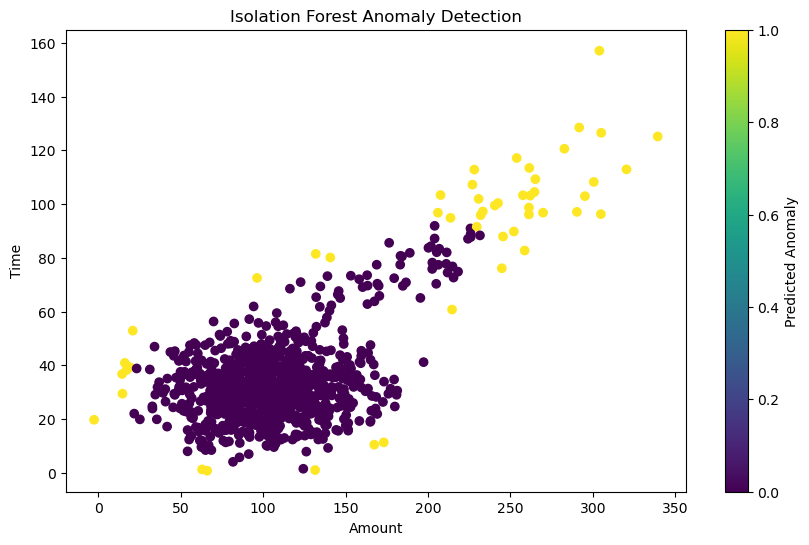

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(X['Amount'], X['Time'], c=predicted_labels, cmap='viridis', marker='o')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title('Isolation Forest Anomaly Detection')
plt.colorbar(label='Predicted Anomaly')
plt.show()

# K-NN based

In [64]:
k = 10
nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(X)
distances, _ = nbrs.kneighbors(X)

anomaly_scores = np.mean(distances, axis=1)

threshold = np.percentile(anomaly_scores, 100 * 0.05)
predicted_label = anomaly_scores > threshold

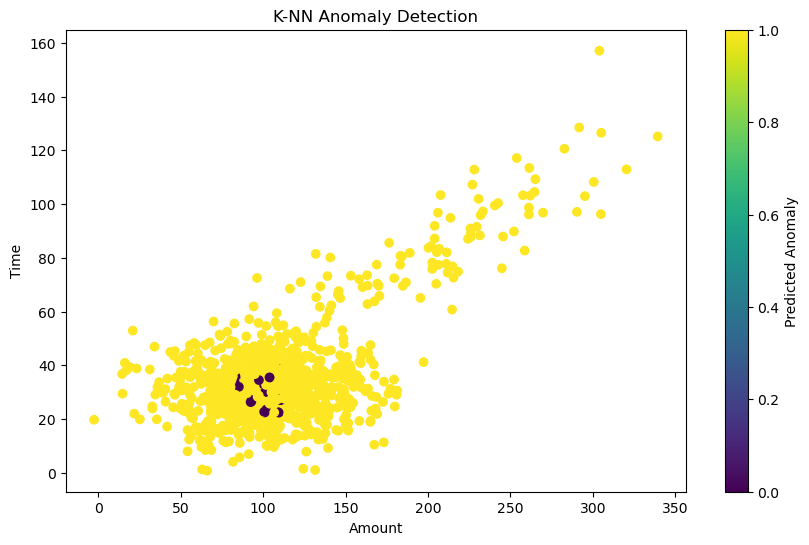

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(X['Amount'], X['Time'], c=predicted_label, cmap='viridis', marker='o')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title('K-NN Anomaly Detection')
plt.colorbar(label='Predicted Anomaly')
plt.show()